In [19]:
import re
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
api_key = open('quandlapikey.txt', 'r').read()

In [2]:
#get 50 states using pandas read html from wikipedia

def state_list():
    fifty_states = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
    return fifty_states[0].iloc[:, 1]

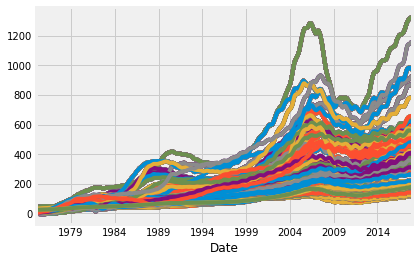

In [3]:
def grab_initial_state_data():
    
    states = state_list()
    
    main_df = pd.DataFrame()
        
    df = quandl.get('FMAC/HPI', authtoken=api_key)
    for abbv in states:
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0 # change to % info and look graph1
        #main_df['NSA Value' + abbv] = df['NSA Value']
        #main_df['SA Value' + abbv] = df['SA Value']

        #print(query)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, lsuffix=abbv)
            
    pickle_out = open('fifty_states4.pickle', 'wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

grab_initial_state_data()

HPI_data = pd.read_pickle('fifty_states4.pickle')

HPI_data.plot()
plt.legend().remove()


In [4]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["NSA Value"] = (df['NSA Value'] - df['NSA Value'][0]) / df['NSA Value'][0] * 100.0
    return df

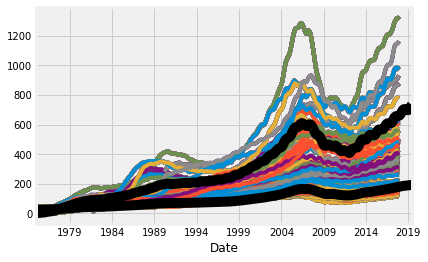

In [5]:
fig = plt.figure()
#Organizes subplot 
#Creates a 1x1 grid 
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data
benchmark = HPI_Benchmark()
HPI_data.plot(ax=ax1)
#color k = black
benchmark.plot(color='k',ax=ax1, linewidth=10)

plt.legend().remove()


# Corralation of the data

In [6]:
HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_state_corralation = HPI_data.corr()
print(HPI_state_corralation)

             NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
NSA ValueAL     1.000000    0.999791     0.955979    0.955735     0.946364   
SA ValueAL      0.999791    1.000000     0.955789    0.955938     0.946330   
NSA ValueAK     0.955979    0.955789     1.000000    0.999780     0.925931   
SA ValueAK      0.955735    0.955938     0.999780    1.000000     0.925876   
NSA ValueAZ     0.946364    0.946330     0.925931    0.925876     1.000000   
SA ValueAZ      0.946209    0.946397     0.925769    0.925942     0.999929   
NSA ValueAR     0.995937    0.995819     0.973941    0.973783     0.946409   
SA ValueAR      0.995768    0.995959     0.973772    0.973918     0.946380   
NSA ValueCA     0.948956    0.948863     0.934404    0.934300     0.982048   
SA ValueCA      0.948791    0.948980     0.934244    0.934418     0.981987   
NSA ValueCO     0.951212    0.951030     0.951306    0.951138     0.933707   
SA ValueCO      0.951045    0.951260     0.951171    0.951378   

In [7]:
HPI_state_corralation.describe()

,NSA ValueAL,SA ValueAL,NSA ValueAK,SA ValueAK,NSA ValueAZ,SA ValueAZ,NSA ValueAR,SA ValueAR,NSA ValueCA,SA ValueCA,...,NSA ValueVA,SA ValueVA,NSA ValueWA,SA ValueWA,NSA ValueWV,SA ValueWV,NSA ValueWI,SA ValueWI,NSA ValueWY,SA ValueWY
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.971307,0.971302,0.947092,0.947060,0.943403,0.943357,0.973190,0.973174,0.953440,0.953409,...,0.968663,0.968670,0.964291,0.964354,0.967139,0.967154,0.967199,0.967360,0.947647,0.947624
std,0.022852,0.022844,0.035172,0.035209,0.022261,0.022274,0.022685,0.022684,0.019490,0.019506,...,0.022934,0.022961,0.023051,0.023061,0.027263,0.027275,0.022759,0.022724,0.036814,0.036836
min,0.893648,0.893688,0.811714,0.811283,0.882504,0.882468,0.885795,0.885826,0.893019,0.892645,...,0.872589,0.872231,0.887710,0.887510,0.861034,0.861110,0.898940,0.899293,0.810307,0.809939
25%,0.956629,0.956673,0.934364,0.934389,0.933701,0.933603,0.965194,0.965200,0.945192,0.945176,...,0.962774,0.962829,0.958760,0.958842,0.956302,0.956284,0.952004,0.952264,0.934325,0.934267
50%,0.975984,0.976021,0.955391,0.955399,0.944466,0.944457,0.977334,0.977362,0.953808,0.953755,...,0.973360,0.973282,0.968933,0.968946,0.973584,0.973584,0.971272,0.971390,0.957634,0.957633
75%,0.987107,0.987017,0.964964,0.964981,0.954539,0.954480,0.989982,0.989904,0.965487,0.965519,...,0.980901,0.981019,0.976102,0.976132,0.985177,0.985209,0.985768,0.985777,0.968659,0.968578
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Resampling Data

Date
1975-12-31    33.949330
1976-12-31    36.305583
1977-12-31    39.931259
1978-12-31    45.815707
1979-12-31    53.222412
Freq: A-DEC, Name: NSA ValueTX, dtype: float64


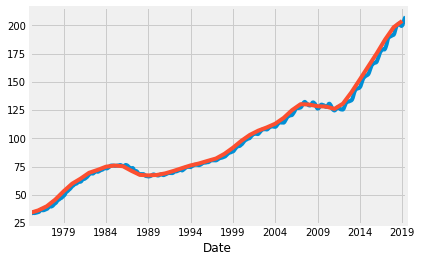

In [8]:
fig = plt.figure()
#Organizes subplot 
#Creates a 1x1 grid 
ax1 = plt.subplot2grid((1,1), (0,0))

TX1yr = HPI_data['NSA ValueTX'].resample('A').mean()
print(TX1yr.head())

HPI_data['NSA ValueTX'].plot(ax=ax1)
TX1yr.plot(ax = ax1)

plt.legend().remove()

Date
1975-12-31    33.770699
1976-12-31    36.114292
1977-12-31    39.721155
1978-12-31    45.573896
1979-12-31    52.941562
Freq: A-DEC, Name: SA ValueTX, dtype: float64


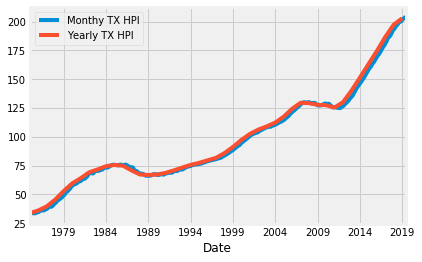

In [9]:
fig = plt.figure()
#Organizes subplot 
#Creates a 1x1 grid 
ax1 = plt.subplot2grid((1,1), (0,0))

TX1yr = HPI_data['SA ValueTX'].resample('A').mean()
print(TX1yr.head())

HPI_data['SA ValueTX'].plot(ax=ax1, label='Monthy TX HPI')
TX1yr.plot(ax = ax1, label='Yearly TX HPI')

plt.legend()

# Plotting the high, low, close, open 

                 open       high        low      close
Date                                                  
1975-12-31  32.686900  34.564055  32.686900  34.564055
1976-12-31  34.637518  37.245297  34.637518  37.245297
1977-12-31  37.388899  42.074937  37.388899  42.074937
1978-12-31  42.448640  48.647561  42.448640  48.647561
1979-12-31  49.111851  56.938306  49.111851  56.938306


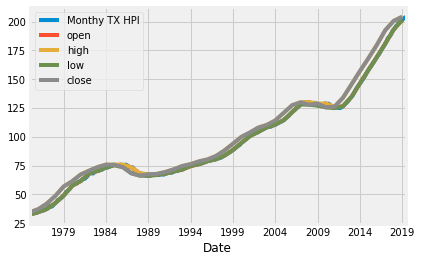

In [10]:
fig = plt.figure()
#Organizes subplot 
#Creates a 1x1 grid 
ax1 = plt.subplot2grid((1,1), (0,0))

TX1yr = HPI_data['SA ValueTX'].resample('A').ohlc()
print(TX1yr.head())

HPI_data['SA ValueTX'].plot(ax=ax1, label='Monthy TX HPI')
TX1yr.plot(ax = ax1, label='Yearly TX HPI')

plt.legend()

# Missing Data

            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN


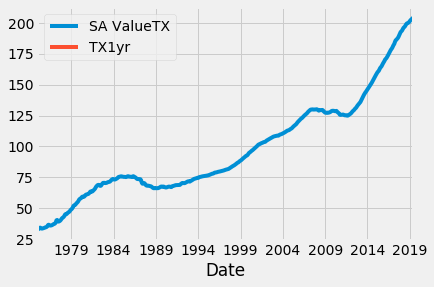

In [64]:
fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX1yr'] = HPI_data['SA ValueTX'].resample('A').mean()
print(HPI_data[['SA ValueTX', 'TX1yr']].head())

HPI_data[['SA ValueTX', 'TX1yr']].plot(ax = ax1)

#plot.legend()


## Drop NaN

            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN
            SA ValueTX      TX1yr
Date                             
1975-12-31   34.564055  33.770699
1976-12-31   37.245297  36.114292
1977-12-31   42.074937  39.721155
1978-12-31   48.647561  45.573896
1979-12-31   56.938306  52.941562


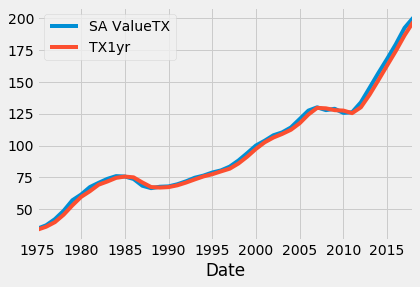

In [63]:
fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX1yr'] = HPI_data['SA ValueTX'].resample('A').mean()

print(HPI_data[['SA ValueTX', 'TX1yr']].head())
HPI_data_drop = HPI_data.dropna()
print(HPI_data_drop[['SA ValueTX', 'TX1yr']].head())


HPI_data_drop[['SA ValueTX', 'TX1yr']].plot(ax = ax1)

#plot.legend()


# fillna every row with missing data

            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN
            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN


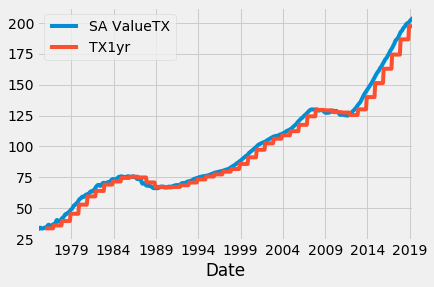

In [62]:
fig = plt.figure()
 
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX1yr'] = HPI_data['SA ValueTX'].resample('A').mean()

print(HPI_data[['SA ValueTX', 'TX1yr']].head())
#HPI_data_drop = HPI_data.dropna()
HPI_data_fillna = HPI_data.fillna(method='ffill') # forward method

print(HPI_data_fillna[['SA ValueTX', 'TX1yr']].head())


HPI_data_fillna[['SA ValueTX', 'TX1yr']].plot(ax = ax1)

#plot.legend()


            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN
            SA ValueTX      TX1yr
Date                             
1975-01-31   32.686900  33.770699
1975-02-28   32.976201  33.770699
1975-03-31   33.432687  33.770699
1975-04-30   34.196993  33.770699
1975-05-31   34.345828  33.770699


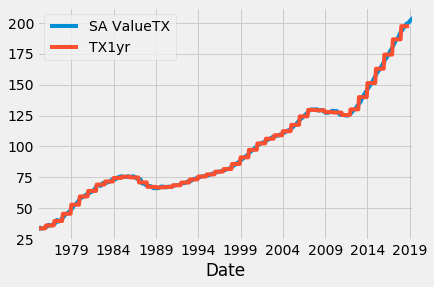

In [61]:
fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX1yr'] = HPI_data['SA ValueTX'].resample('A').mean()

print(HPI_data[['SA ValueTX', 'TX1yr']].head())
#HPI_data_drop = HPI_data.dropna()
HPI_data_fillna = HPI_data.fillna(method='bfill') # backward method

print(HPI_data_fillna[['SA ValueTX', 'TX1yr']].head())


HPI_data_fillna[['SA ValueTX', 'TX1yr']].plot(ax = ax1)

#plot.legend()


## fill data with a value

            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN
            SA ValueTX    TX1yr
Date                           
1975-01-31   32.686900 -99999.0
1975-02-28   32.976201 -99999.0
1975-03-31   33.432687 -99999.0
1975-04-30   34.196993 -99999.0
1975-05-31   34.345828 -99999.0


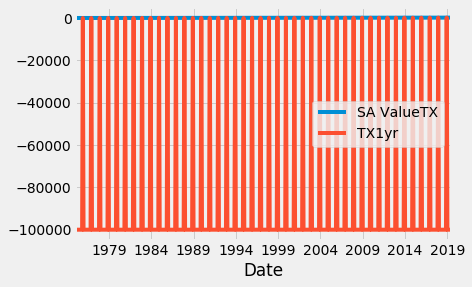

In [60]:
fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX1yr'] = HPI_data['SA ValueTX'].resample('A').mean()

print(HPI_data[['SA ValueTX', 'TX1yr']].head())
#HPI_data_drop = HPI_data.dropna()
HPI_data_fillna = HPI_data.fillna(value=-99999) # filling data with value

print(HPI_data_fillna[['SA ValueTX', 'TX1yr']].head())


HPI_data_fillna[['SA ValueTX', 'TX1yr']].plot(ax = ax1)

#plot.legend()


            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN
            SA ValueTX  TX1yr
Date                         
1975-01-31   32.686900    NaN
1975-02-28   32.976201    NaN
1975-03-31   33.432687    NaN
1975-04-30   34.196993    NaN
1975-05-31   34.345828    NaN
54


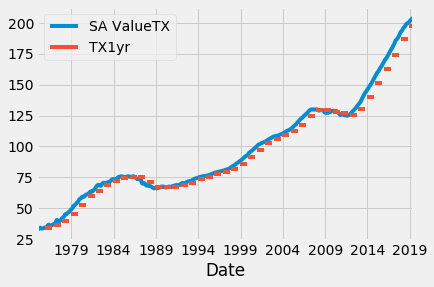

In [59]:
fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX1yr'] = HPI_data['SA ValueTX'].resample('A').mean()

print(HPI_data[['SA ValueTX', 'TX1yr']].head())
#HPI_data_drop = HPI_data.dropna()
HPI_data_fillna = HPI_data.fillna(method='ffill', limit=10) # forward method

print(HPI_data_fillna[['SA ValueTX', 'TX1yr']].head())

print(HPI_data_fillna.isnull().values.sum())

HPI_data_fillna[['SA ValueTX', 'TX1yr']].plot(ax = ax1)

#plot.legend()


# Rolling Statistics

            SA ValueTX  TX12MA
Date                          
1975-01-31   32.686900     NaN
1975-02-28   32.976201     NaN
1975-03-31   33.432687     NaN
1975-04-30   34.196993     NaN
1975-05-31   34.345828     NaN


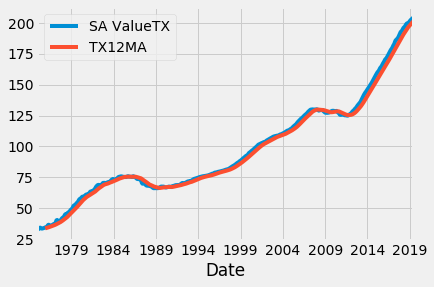

In [58]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX12MA'] = HPI_data['SA ValueTX'].rolling(12).mean()

#moving_avg = pd.rolling_mean(ts_log,12)
#moving_avg = ts_log.rolling(12).mean()

print(HPI_data[['SA ValueTX', 'TX12MA']].head())

HPI_data[['SA ValueTX', 'TX12MA']].plot(ax = ax1)


            SA ValueTX  TX12MA
Date                          
1975-01-31   32.686900     NaN
1975-02-28   32.976201     NaN
1975-03-31   33.432687     NaN
1975-04-30   34.196993     NaN
1975-05-31   34.345828     NaN


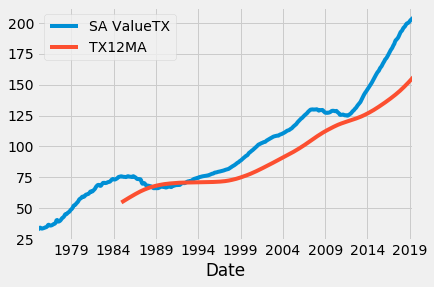

In [57]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX12MA'] = HPI_data['SA ValueTX'].rolling(120).mean()

#moving_avg = pd.rolling_mean(ts_log,12)
#moving_avg = ts_log.rolling(12).mean()

print(HPI_data[['SA ValueTX', 'TX12MA']].head())

HPI_data[['SA ValueTX', 'TX12MA']].plot(ax = ax1)

            SA ValueTX     TX12MA
Date                             
1984-12-31   75.920252  54.720735
1985-01-31   75.675168  55.078970
1985-02-28   75.609417  55.434247
1985-03-31   75.451362  55.784403
1985-04-30   75.432998  56.128036


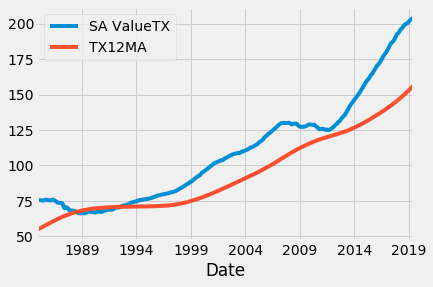

In [56]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX12MA'] = HPI_data['SA ValueTX'].rolling(120).mean()

#moving_avg = pd.rolling_mean(ts_log,12)
#moving_avg = ts_log.rolling(12).mean()

HPI_data.dropna(inplace=True)
print(HPI_data[['SA ValueTX', 'TX12MA']].head())

HPI_data[['SA ValueTX', 'TX12MA']].plot(ax = ax1)

In [ ]:
## Standar Deviation

            SA ValueTX  TX12MA  TX12STD
Date                                   
1975-01-31   32.686900     NaN      NaN
1975-02-28   32.976201     NaN      NaN
1975-03-31   33.432687     NaN      NaN
1975-04-30   34.196993     NaN      NaN
1975-05-31   34.345828     NaN      NaN


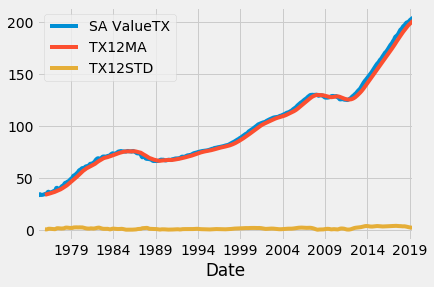

In [55]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data['TX12MA'] = HPI_data['SA ValueTX'].rolling(12).mean()
HPI_data['TX12STD'] = HPI_data['SA ValueTX'].rolling(12).std()


#moving_avg = pd.rolling_mean(ts_log,12)
#moving_avg = ts_log.rolling(12).mean()

print(HPI_data[['SA ValueTX', 'TX12MA', 'TX12STD']].head())

HPI_data[['SA ValueTX', 'TX12MA', 'TX12STD']].plot(ax = ax1)

# Rolling statistics - mean

            SA ValueTX  TX12MA  TX12STD
Date                                   
1975-01-31   32.686900     NaN      NaN
1975-02-28   32.976201     NaN      NaN
1975-03-31   33.432687     NaN      NaN
1975-04-30   34.196993     NaN      NaN
1975-05-31   34.345828     NaN      NaN


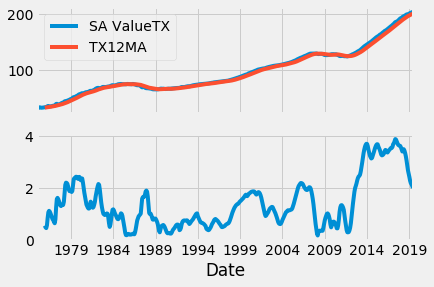

In [54]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

HPI_data = pd.read_pickle('fiddy_states3.pickle')
HPI_data['TX12MA'] = HPI_data['SA ValueTX'].rolling(12).mean()
HPI_data['TX12STD'] = HPI_data['SA ValueTX'].rolling(12).std()


#moving_avg = pd.rolling_mean(ts_log,12)
#moving_avg = ts_log.rolling(12).mean()

print(HPI_data[['SA ValueTX', 'TX12MA', 'TX12STD']].head())

HPI_data[['SA ValueTX', 'TX12MA']].plot(ax = ax1)
HPI_data['TX12STD'].plot(ax = ax2)


# Rolling statistics - corralation 

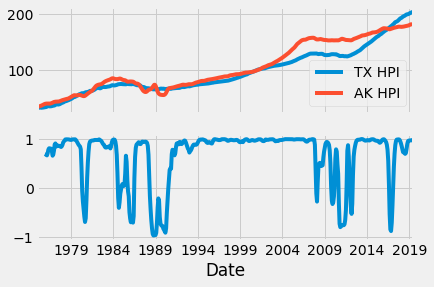

In [79]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

HPI_data = pd.read_pickle('fiddy_states3.pickle')

TX_AK_12corr = HPI_data['SA ValueTX'].rolling(12).corr(HPI_data['SA ValueAK'])

HPI_data['SA ValueTX'].plot(ax = ax1, label='TX HPI')
HPI_data['SA ValueAK'].plot(ax = ax1, label='AK HPI')

ax1.legend(loc=4)

TX_AK_12corr.plot(ax=ax2, label='TX_AK_12corr')